In [27]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('MNRAS')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
file = np.load("file_counts_bias.npz")
mass_list = file["mean_mass"]
bias_list = file["mean_bias"]
counts_list = file["N_lam"]
lambda_edges = file["lambda_edges"]

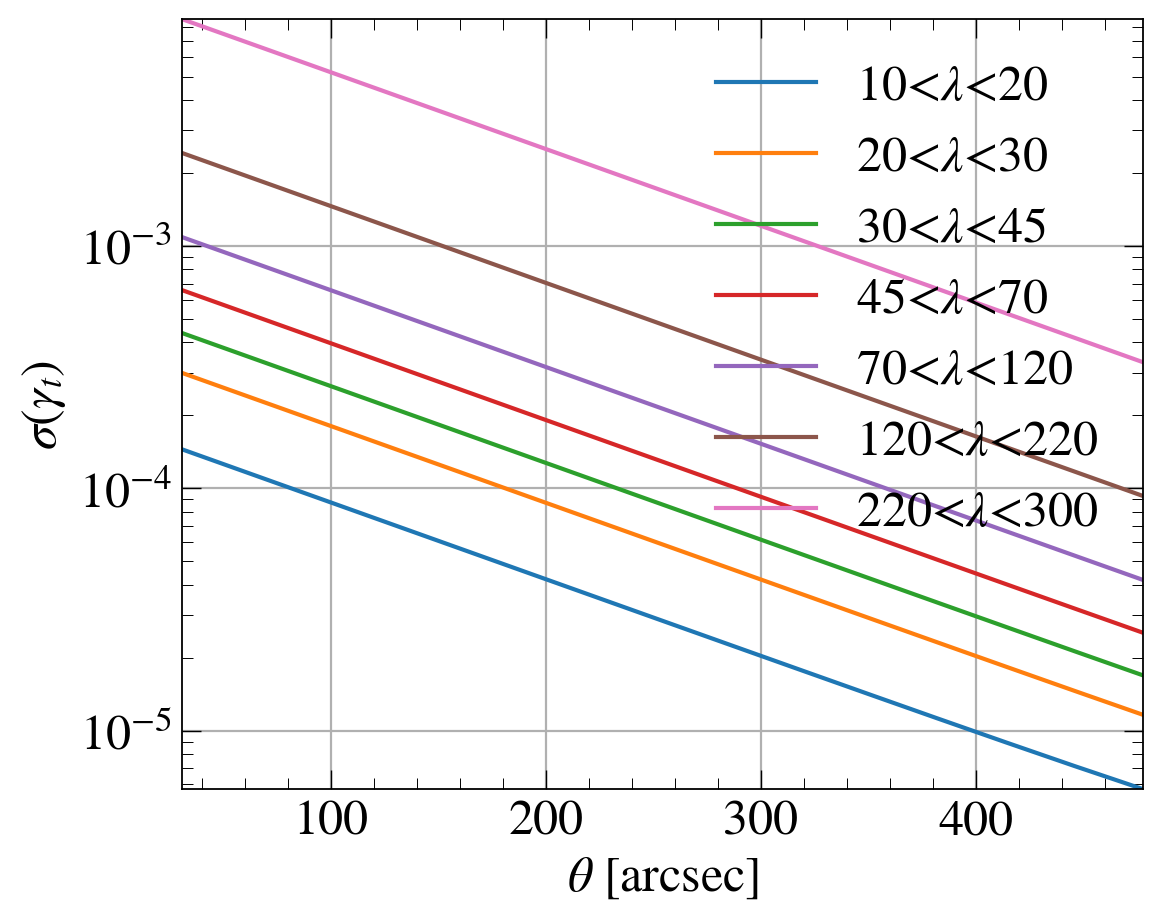

In [29]:
nbins = len(lambda_edges) - 1
for ibin in range(nbins):
    counts = counts_list[ibin]
    bias = bias_list[ibin]
    lam_min = lambda_edges[ibin]
    lam_max = lambda_edges[ibin+1]
    output_loc = 'anacal_analytic_counts_bias/'
    bin_name = f'lam_{lam_min}_{lam_max}'
    cov = np.loadtxt(output_loc + f'gammat_cov_shape_noise_{bin_name}.dat')
    theta = np.loadtxt(output_loc + f'theta_{bin_name}.dat')[:,2] 
    theta = theta / np.pi * 180. * 3600. # arcsec
    plt.plot(theta, np.sqrt(np.diag(cov)), label=f'{lam_min}<$\\lambda$<{lam_max}')
    plt.xlabel(r'$\theta ~\rm [arcsec]$')
    plt.ylabel(r'$\sigma(\gamma_t)$')
    plt.legend(frameon=False)
    plt.yscale('log')